# Lab 4: Working with "real" data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
# importing the file
hf = h5py.File('../gammaray_lab4.h5', 'r')

Within hdf5 files you can store different kinds of data sets. Ours is simple and has one called 'data'. You can look at the header and see this using

In [3]:
hf.keys()

<KeysViewHDF5 ['data']>

In [4]:
# import the data into an array variable using the get method
# data = np.array(hf.get('data'))

In [5]:
# we close the file using
# hf.close()

## Problem 1

We are lookign at data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 millisecounds, and is in an apporx. 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

In [6]:
# import the data into an array variable using the get method
data = np.array(hf.get('data'))

In [7]:
times = data[0, :]
solar_phase = data[1, :]
longitude = data[2, :]
particle_count = data[3, :]

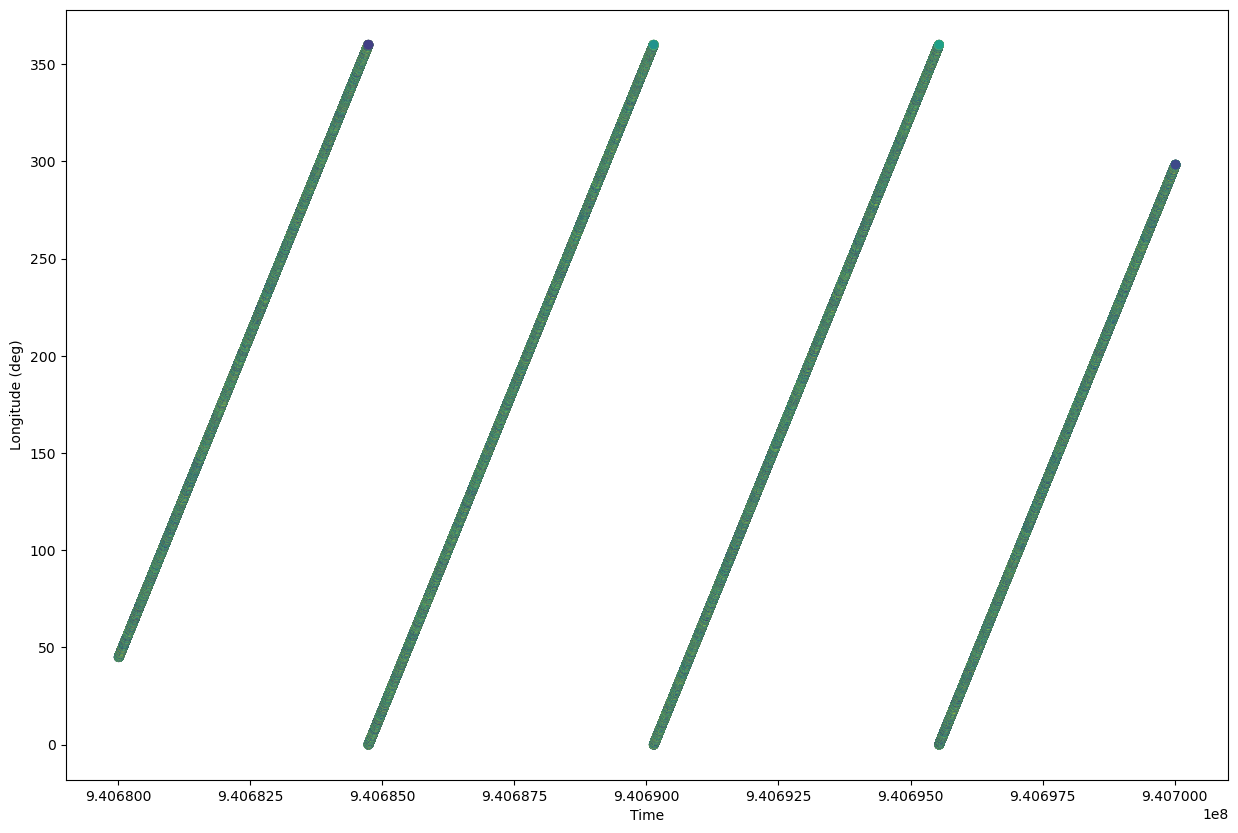

In [8]:
colors = np.random.rand(len(times[0:200000]))
plt.scatter(times[0:200000], longitude[0:200000], c=colors)
plt.xlabel('Time')
plt.ylabel('Longitude (deg)')
plt.show()

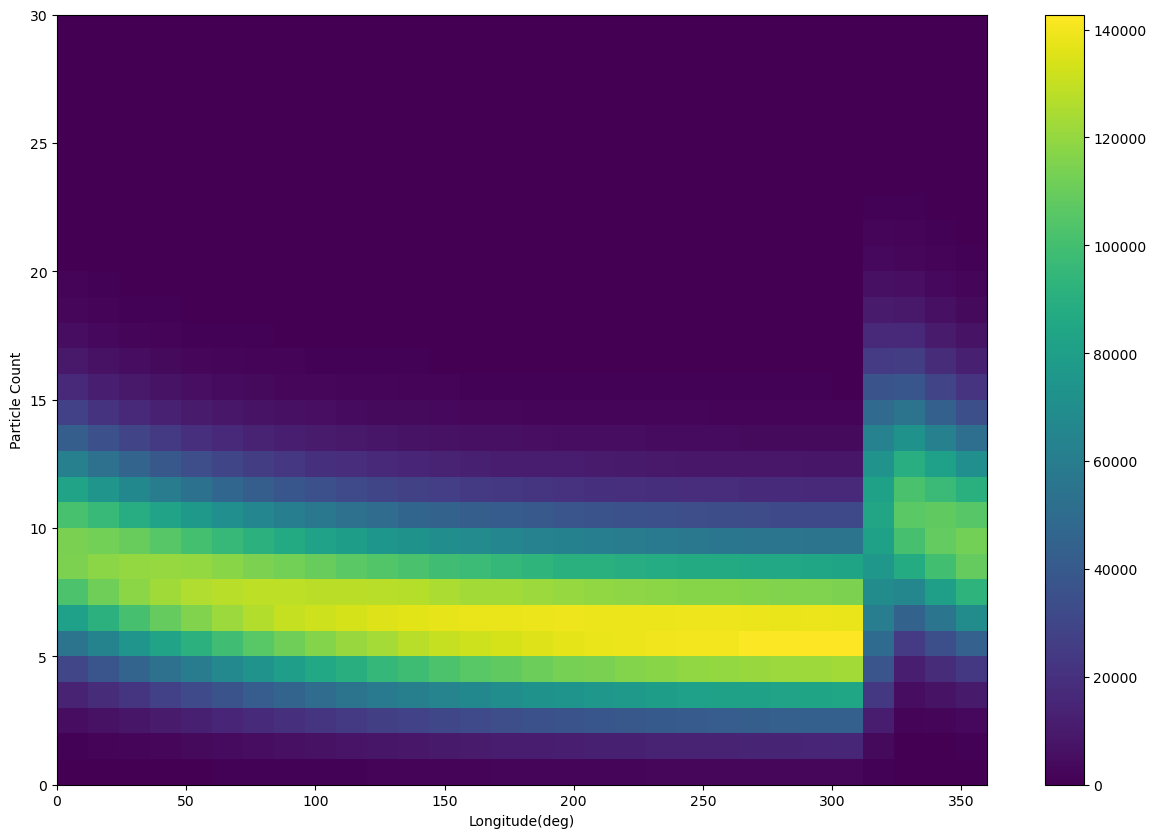

In [9]:
plt.hist2d(longitude, particle_count, bins=30)
plt.colorbar()
plt.xlabel('Longitude(deg)')
plt.ylabel('Particle Count')
plt.show()

a) Specifically comment on whether you see signal contamination in your data, and how you plan to build a background pdf().

Looking at the plot of the longitude vs particle count 2D plot, there seems to be some kind of phase shift. On the Longitude axis (between 300 and 360 degrees), all those data points seem to belong somewhere else, like the left side. So, to build my background pdf(), I would have to somehow shift that part of the data to the left. That is I must cut off my data somewhere between 300 and 360 degrees in the logitude axis, move the left hand size over by 360-(the cut off point) and stitch the data I've cutt off to be from 0 degrees to the cut size.

4319520


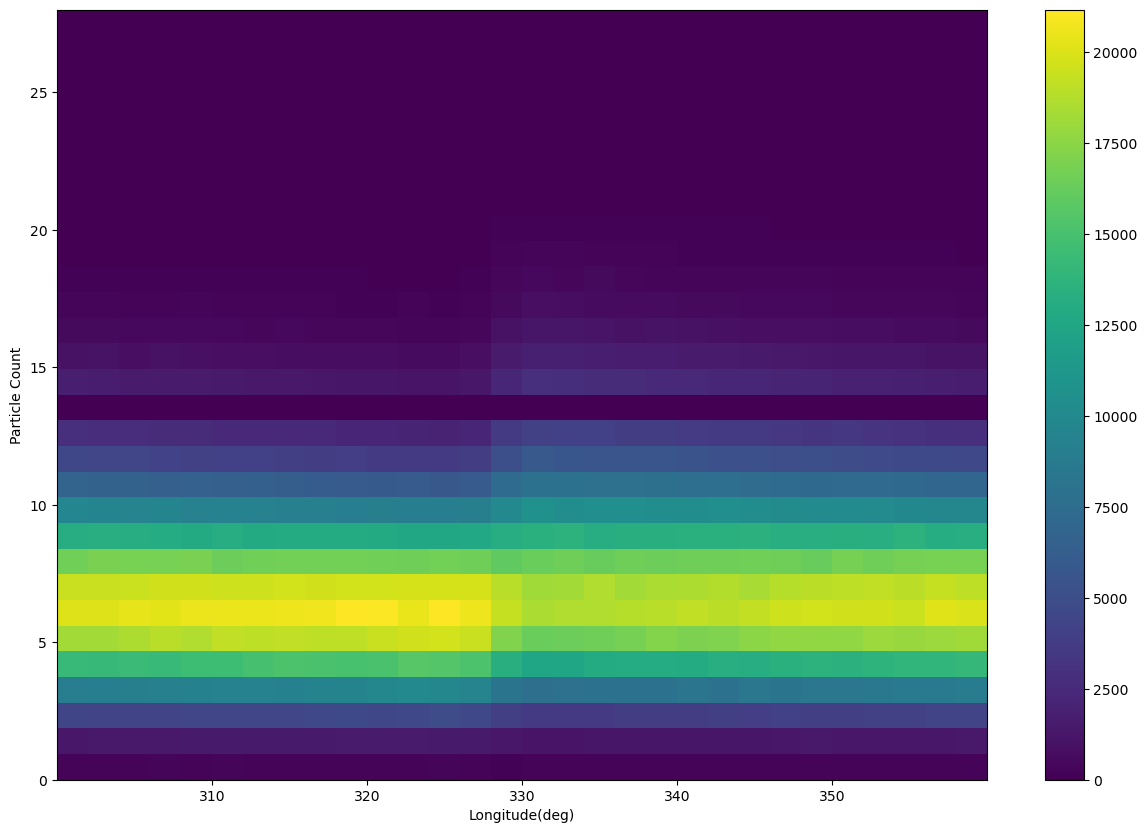

In [ ]:
# fixing background
# we need to find the cut off point
test1 = longitude[longitude > 300]
print(len(test1))

plt.hist2d(test1, particle_count[len(particle_count)-len(test1):], bins=30)
plt.colorbar()
plt.xlabel('Longitude(deg)')
plt.ylabel('Particle Count')
plt.show()

plt.hist2d(longitude, particle_count, bins=30)
plt.colorbar()
plt.xlabel('Longitude(deg)')
plt.ylabel('Particle Count')
plt.xlim(300, 360)
plt.show()

plt.hist2d(longitude, particle_count, bins=30)
plt.colorbar()
plt.xlabel('Longitude(deg)')
plt.ylabel('Particle Count')
plt.title
plt.xlim(311, 313)
plt.show()

From the last plot above, it looks like the cut off point is 312 degrees. This means we take everything from 312 to 360 degrees out, shift everything to the left of 312 to the right by 48 degrees, and the data we just removed will become the first 48 degrees for our data.

In [ ]:
cutarray2 = [(x + 48) % 360  for x in longitude]

plt.hist2d(cutarray2, particle_count, bins=30)
plt.colorbar()
plt.xlabel('Longitude(deg)')
plt.ylabel('Particle Count')
plt.title
plt.show()

b) The background is not consistent across the dataset. Find and describe as accurately how the background changes

As mentioned above, there seems to be a shift, a chunk of background data are not wehere they are supposed to be. Looking the longitude vs particle count 2D plot from left to right, it almost looks like the background is an exponential decay. But somewhere between 300 and 360 degrees the background looks off, but if we took the data around this interval, and moved it to the start, our background would look like an exponential decay.

c) 